# Week 11 - Introduction to Modeling, part 2

# 1. Lesson - No lesson this week

# 2. Weekly graph question

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

The book names one of Vonnegut's rules as "keep it simple" and another as "have the guts to cut."  Here is some data from the previous week's lesson.  If you had to cut one of the two plots below, which would it be?  Which seems more interesting or important?  Explain.  (Should "amount of training data used" or "number of estimators" be on the x-axis.)

In [2]:
np.random.seed(0)
num_points = 10000
feature_1a = np.random.random(size = num_points) * 3
feature_2a = np.random.random(size = num_points) * 3
feature_3a = np.random.random(size = num_points) * 3
train_target = (feature_1a - 2 * feature_2a) * feature_3a + np.random.normal(size = num_points)
feature_1b = np.random.random(size = num_points) * 3
feature_2b = np.random.random(size = num_points) * 3
feature_3b = np.random.random(size = num_points) * 3
test_target = (feature_1b - 2 * feature_2b) * feature_3b + np.random.normal(size = num_points)
train_df = pd.DataFrame({"f1": feature_1a, "f2": feature_2a, "f3": feature_3a})
test_df = pd.DataFrame({"f1": feature_1b, "f2": feature_2b, "f3": feature_3b})
rf = RandomForestRegressor()
rf.fit(train_df.values, train_target)

RandomForestRegressor()

In [3]:
rmse_lst = list()
rf = RandomForestRegressor()
for x in range(round(num_points / 20), num_points, round(num_points / 20)):
    rf.fit(train_df.values[0:x,:], train_target[0:x])
    rmse_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

import matplotlib.pyplot as plt

Text(0, 0.5, 'Loss function')

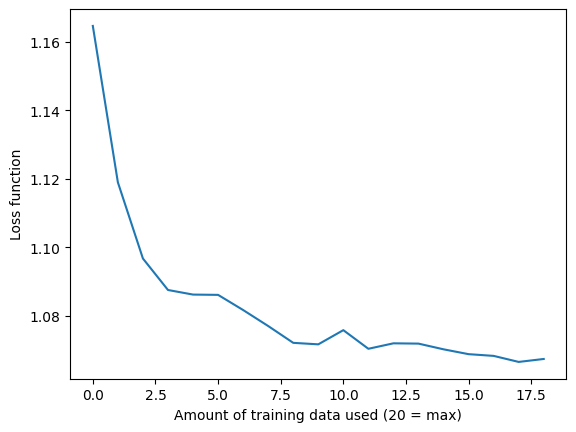

In [4]:
plt.plot(rmse_lst)
plt.xlabel("Amount of training data used (20 = max)")
plt.ylabel("Loss function")

In [ ]:
num_trees_lst = list()
for n_estimators in range(1, 100, 3):
    rf = RandomForestRegressor(n_estimators = n_estimators)
    rf.fit(train_df.values, train_target)
    num_trees_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

Text(0, 0.5, 'Loss function')

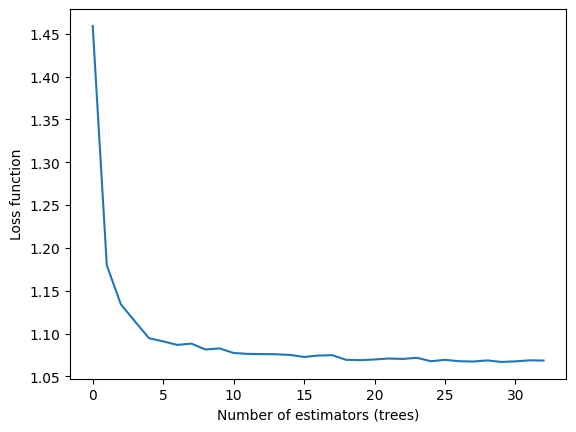

In [ ]:
plt.plot(num_trees_lst)
plt.xlabel("Number of estimators (trees)")
plt.ylabel("Loss function")

First graph: mount of Training Data Used. This plot shows how the performance of the model (measured by RMSE) changes as more data is fed into the model. It's a classic way to evaluate how increasing the dataset size can help reduce overfitting and improve model performance. This plot is useful for understanding the effect of the dataset size on model performance

Second graph:Number of Estimators (Trees) vs. RMSE. This plot shows how the performance of the model varies as the number of trees (estimators) in the Random Forest is adjusted. More estimators should lead to a better model.This plot is helpful to see whether the Random Forest has reached a point of diminishing returns with additional trees. It’s important for determining the right balance between model performance and computational efficiency.

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:

* Implement a random forest model.
* Perform cross-validation.
* Tune hyperparameters.
* Evaluate a performance metric.

If you like, you can try other types of models, too (beyond linear regression and random forest) although you will have many opportunities to do that next semester.

In [3]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

/usr/local/python/3.12.1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
file_path = "realtor-data.zip.csv"  # Replace with the correct file name

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "ahmedshahriarsakib/usa-real-estate-dataset",
  file_path,
)

print("First 5 records:", df.head())

/tmp/ipykernel_3861/3942784006.py:4: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


First 5 records:    brokered_by    status     price  bed  bath  acre_lot     street  \
0     103378.0  for_sale  105000.0  3.0   2.0      0.12  1962661.0   
1      52707.0  for_sale   80000.0  4.0   2.0      0.08  1902874.0   
2     103379.0  for_sale   67000.0  2.0   1.0      0.15  1404990.0   
3      31239.0  for_sale  145000.0  4.0   2.0      0.10  1947675.0   
4      34632.0  for_sale   65000.0  6.0   2.0      0.05   331151.0   

         city        state  zip_code  house_size prev_sold_date  
0    Adjuntas  Puerto Rico     601.0       920.0            NaN  
1    Adjuntas  Puerto Rico     601.0      1527.0            NaN  
2  Juana Diaz  Puerto Rico     795.0       748.0            NaN  
3       Ponce  Puerto Rico     731.0      1800.0            NaN  
4    Mayaguez  Puerto Rico     680.0         NaN            NaN  


In [17]:
austin_df = df[(df['city'].str.lower() == 'austin')  &(df['city'].str.lower() == 'austin')].reset_index(drop=True)
austin_df

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,101440.0,for_sale,32000.0,4.0,2.0,0.50,1717247.0,Austin,Pennsylvania,16720.0,1684.0,2005-09-02
1,45928.0,for_sale,176500.0,5.0,2.0,2.64,924975.0,Austin,Pennsylvania,16720.0,1664.0,NaN
2,81326.0,for_sale,725000.0,5.0,2.0,140.08,491703.0,Austin,Pennsylvania,16720.0,2259.0,2021-07-01
3,25319.0,for_sale,25000.0,1.0,NaN,0.69,1794975.0,Austin,Pennsylvania,16720.0,357.0,NaN
4,25319.0,for_sale,25000.0,1.0,NaN,0.69,1794992.0,Austin,Pennsylvania,16720.0,357.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2240,69999.0,sold,559000.0,6.0,4.0,0.36,1689508.0,Austin,Texas,78753.0,2927.0,2021-12-30
2241,97859.0,sold,579000.0,3.0,2.0,0.22,406815.0,Austin,Texas,78734.0,1465.0,2021-12-30
2242,53481.0,sold,830000.0,4.0,3.0,0.21,406148.0,Austin,Texas,78738.0,3220.0,2021-12-30
2243,101179.0,sold,399900.0,3.0,2.0,0.18,188406.0,Austin,Texas,78754.0,1505.0,2022-01-20


In [18]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Drop rows with missing target
df = austin_df.dropna(subset=["house_size"])

# Define features and target
X = df.drop(columns=["house_size", "prev_sold_date", "zip_code", "street"])  # Drop irrelevant/unavailable columns
y = df["house_size"]

# Identify column types
numerical_cols = X.select_dtypes(include=["float64", "int64"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()

# Preprocessing
numeric_transformer = SimpleImputer(strategy="median")
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numerical_cols),
    ("cat", categorical_transformer, categorical_cols)
])

# Full pipeline with Random Forest
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(random_state=42))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cross-validation (before tuning)
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="r2")
print("Cross-Validation R² Scores:", cv_scores)
print("Average CV R²:", np.mean(cv_scores))

# Hyperparameter tuning
param_distributions = {
    "regressor__n_estimators": [100, 200, 300],
    "regressor__max_depth": [None, 10, 20, 30],
    "regressor__min_samples_split": [2, 5, 10],
    "regressor__min_samples_leaf": [1, 2, 4]
}

search = RandomizedSearchCV(model, param_distributions, n_iter=10, cv=3,
                            scoring="r2", random_state=42, n_jobs=-1)
search.fit(X_train, y_train)

# Best model evaluation
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Hyperparameters:", search.best_params_)
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Cross-Validation R² Scores: [0.78169931 0.8377933  0.81581528 0.81137212 0.77796016]
Average CV R²: 0.8049280330715408
Best Hyperparameters: {'regressor__n_estimators': 300, 'regressor__min_samples_split': 2, 'regressor__min_samples_leaf': 2, 'regressor__max_depth': None}
R² Score: 0.8405032840884136
MAE: 334.1611615119073
RMSE: 534.5920252925928


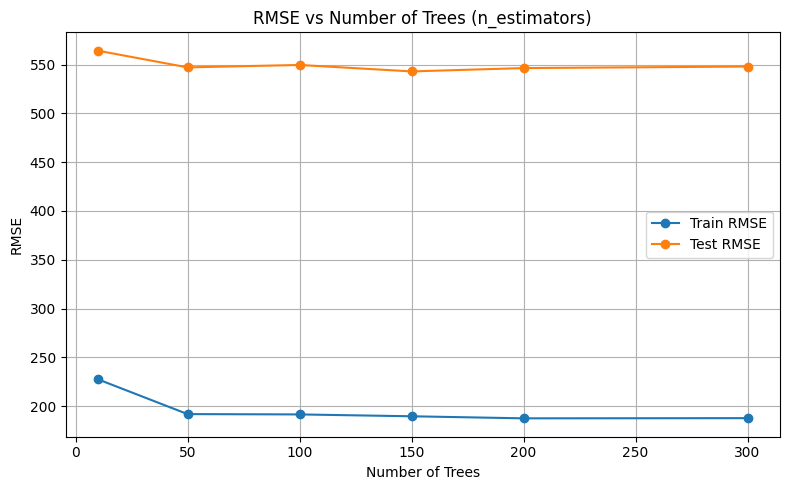

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
estimators_range = [10, 50, 100, 150, 200, 300]
train_rmse = []
test_rmse = []

for n in estimators_range:
    rf = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("regressor", RandomForestRegressor(n_estimators=n, random_state=42))
    ])
    rf.fit(X_train, y_train)
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    
    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(estimators_range, train_rmse, label="Train RMSE", marker="o")
plt.plot(estimators_range, test_rmse, label="Test RMSE", marker="o")
plt.title("RMSE vs Number of Trees (n_estimators)")
plt.xlabel("Number of Trees")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Best Hyperparameters: {'regressor__n_estimators': 100, 'regressor__min_samples_split': 2, 'regressor__min_samples_leaf': 2, 'regressor__max_depth': 6, 'regressor__learning_rate': 0.2}
R² Score: 0.8456813585519286
MAE: 332.7893204982333
RMSE: 525.842639184205


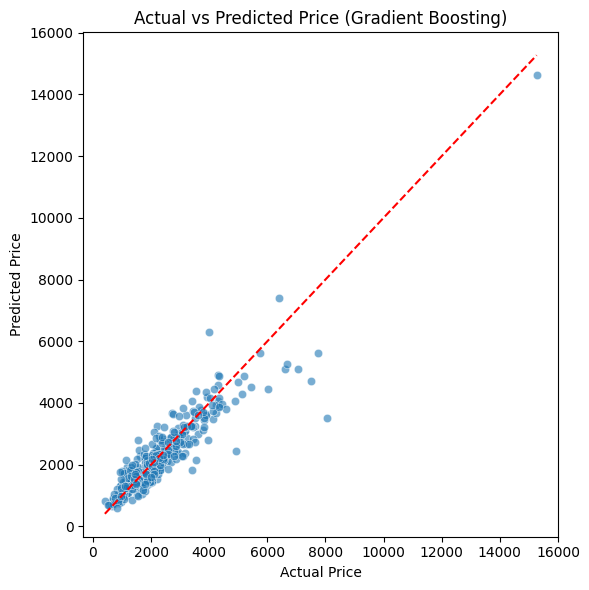

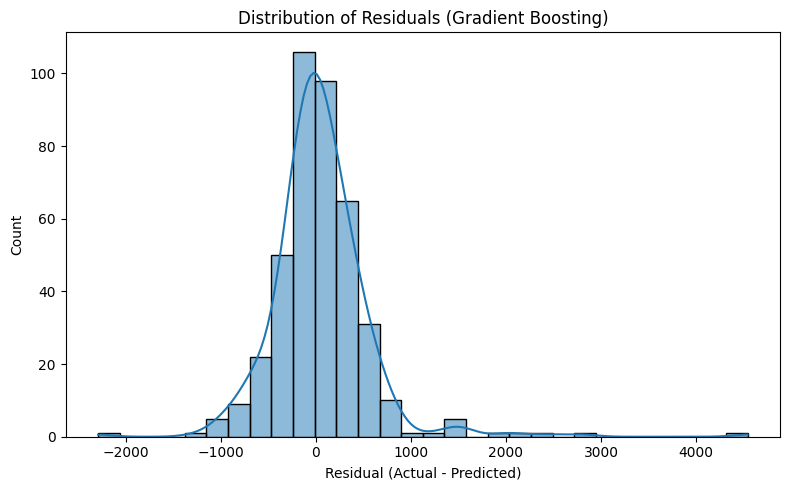

In [21]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

# Create a Gradient Boosting model pipeline
gb_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", GradientBoostingRegressor(random_state=42))
])

# Hyperparameter tuning for Gradient Boosting
param_distributions_gb = {
    "regressor__n_estimators": [100, 200, 300],
    "regressor__learning_rate": [0.001, 0.01, 0.1, 0.2],
    "regressor__max_depth": [3, 4, 5, 6],
    "regressor__min_samples_split": [2, 5, 10],
    "regressor__min_samples_leaf": [1, 2, 4]
}

# Randomized search for hyperparameters
gb_search = RandomizedSearchCV(gb_model, param_distributions_gb, n_iter=10, cv=3,
                               scoring="r2", random_state=42, n_jobs=-1)
gb_search.fit(X_train, y_train)

# Best model evaluation
best_gb_model = gb_search.best_estimator_
y_pred_gb = best_gb_model.predict(X_test)

# Evaluation metrics
print("Best Hyperparameters:", gb_search.best_params_)
print("R² Score:", r2_score(y_test, y_pred_gb))
print("MAE:", mean_absolute_error(y_test, y_pred_gb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gb)))

# Plotting actual vs predicted prices for Gradient Boosting
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred_gb, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price (Gradient Boosting)")
plt.tight_layout()
plt.show()

# Plotting residuals for Gradient Boosting
residuals_gb = y_test - y_pred_gb

plt.figure(figsize=(8, 5))
sns.histplot(residuals_gb, kde=True, bins=30)
plt.title("Distribution of Residuals (Gradient Boosting)")
plt.xlabel("Residual (Actual - Predicted)")
plt.tight_layout()
plt.show()

The Random Forest Regressor achieved an R² score of round 0.8 on the test set. This means the model can explain about 80% of the variation in house prices. With this level of performance, the model is quite reliable for predicting house prices based on the features provided.

The MAE and RMSE values are within a reasonable range, though there’s still room for improvement

Despite having parameters like max_depth=None (which could lead to overfitting), the model shows consistent performance on both training and test data, indicating that it’s not overfitting.

The Gradient Boosting Regressor demonstrated solid performance with an R² of 0.846, indicating it can explain over 84% of the variability in house prices. The chosen hyperparameters—particularly the depth of the trees and the learning rate—allowed the model to strike a balance between capturing complex relationships in the data and avoiding overfitting.These results suggest that the Gradient Boosting approach provides a robust model for predicting house prices, and further tuning or exploring other models could help fine-tune the accuracy.The Gradient Boosting Regressor is highly effective for this problem, providing predictions that are reliable and accurate enough to be used for real-world pricing estimations. The model's R² score and error metrics indicate strong predictive power and can be leveraged for making data-driven decisions in the housing market.

# 4. Storytelling With Data plot

Reproduce any graph of your choice in chapter seven (p. 165-185) of the Storytelling With Data book as best you can. You do not have to get the exact data values right, just the overall look and feel.

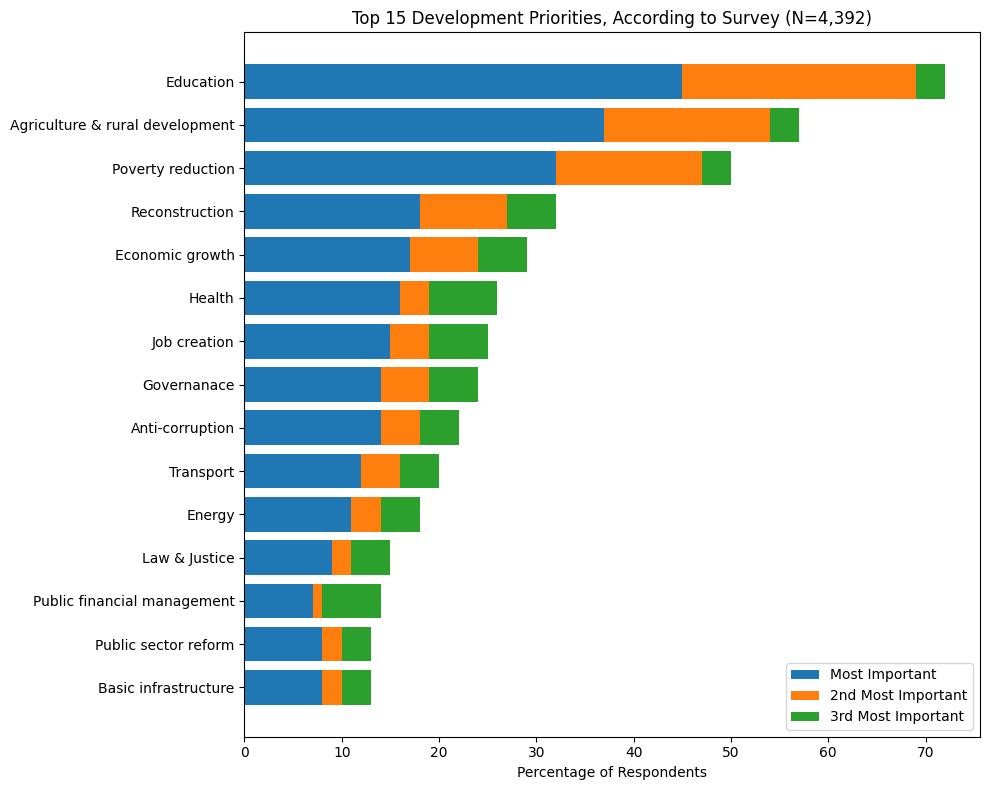

In [ ]:
import matplotlib.pyplot as plt

# Data
priorities = [
    "Education", "Agriculture & rural development", "Poverty reduction", "Reconstruction",
    "Economic growth", "Health", "Job creation", "Governanace", "Anti-corruption",
    "Transport", "Energy", "Law & Justice", "Basic infrastructure",
    "Public sector reform", "Public financial management"
]

most_important = [45, 37, 32, 18, 17, 16, 15, 14, 14, 12, 11, 9, 8, 8, 7]
second_most = [24, 17, 15, 9, 7, 3, 4, 5, 4, 4, 3, 2, 2, 2, 1]
third_most = [3, 3, 3, 5, 5, 7, 6, 5, 4, 4, 4, 4, 3, 3, 6]

# Sorting by total (for better visual impact)
total = [m + s + t for m, s, t in zip(most_important, second_most, third_most)]
sorted_data = sorted(zip(total, priorities, most_important, second_most, third_most), reverse=True)
total, priorities, most_important, second_most, third_most = zip(*sorted_data)

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))
bar1 = ax.barh(priorities, most_important, color="#1f77b4", label="Most Important")
bar2 = ax.barh(priorities, second_most, left=most_important, color="#ff7f0e", label="2nd Most Important")
bar3 = ax.barh(priorities, third_most,
               left=[i + j for i, j in zip(most_important, second_most)],
               color="#2ca02c", label="3rd Most Important")

# Formatting
ax.invert_yaxis()
ax.set_xlabel("Percentage of Respondents")
ax.set_title("Top 15 Development Priorities, According to Survey (N=4,392)")
ax.legend()

plt.tight_layout()
plt.show()
